In [32]:
import kaepora as kpora
import kaepora_plot as kplot
import matplotlib.pyplot as plt
import copy

In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
example_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source < 1.8) or (dm15_from_fits < 1.8))"]

In [35]:
spec_array = kpora.grab(example_query[0], verbose=True, db_file = '../data/kaepora_v1_test.db')
copy_array = copy.deepcopy(spec_array)

170 Total Spectra found
170 spectra of SNe that have host reddening corrections
Arrays cleaned
Name Filename Source SNR Phase MJD MJD_max z Host Morphology Minwave Maxwave
1994s sn1994s-19940616-uoi.flm bsnip 56.524322367 0.998840596273 49519.338 49518.324 0.015177 11.0 3126.0 11080.0
1998dk sn1998dk-19980831-ui.flm bsnip 225.833313606 -0.728371655089 51056.305 51057.043 0.013219 14.0 3310.0 10016.0
1998es sn1998es-19981125-ui-corrected.flm bsnip 173.128497131 0.496750833938 51142.252 51141.75 0.010567 8.0 3348.0 10042.0
1999aa sn1999aa-19990223-ui.flm bsnip 87.383415757 0.460351148368 51232.237 51231.77 0.014443 14.0 3346.0 10348.0
1999ac sn1999ac-19990312-ui-corrected.flm bsnip 184.483349779 -0.385339276873 51249.466 51249.855 0.0095 15.0 3298.0 10350.0
2000cx sn2000cx-20000728-ui.flm bsnip 230.381439474 0.496974506501 51753.396 51752.895 0.0081 None 3328.0 10316.0
2000dn sn2000dn-20001006-uri-corrected.flm bsnip 31.1030531774 -0.845876955424 51823.327 51824.2 0.032065 8.0 3250.0 100

2008Q sn2008Q-20080209.23-fixedbg-swift.flm swift_uv 4.75424211514 -0.2 None None 0.007935 None 1940.0 6662.0
2009Y sn2009Y-20090213.16-fixedbg-swift.flm swift_uv 2.9712695884 -0.7 None None 0.0093 None 1936.0 6672.0
2011by sn2011by-20110510.54-fixedbg-swift.flm swift_uv 12.9178200296 0.6 None None 0.002843 13.0 1948.0 6744.0
2011iv sn2011iv-20111211.70-fixedbg-swift-max.flm swift_uv 4.48315264749 0.5 None None 0.0065 3.0 1940.0 6692.0
2012fr sn2012fr-20121111.62-fixedbg-swift.flm swift_uv 14.3301419009 -0.9 None 56242.859 0.005457 12.0 1944.0 6708.0
2012fr sn2012fr-20121113.39-fixedbg-swift.flm swift_uv 26.1463919056 0.9 None 56242.859 0.005457 12.0 1944.0 6690.0
2014J sn2014j-20140201.37-fixedbg-swift-max.flm swift_uv 51.3753025114 0.4 None None 0.000677 None 1952.0 6746.0


In [43]:
i=0
for spec in spec_array:
    if spec.other_meta_data[1] != None:
        i+=1
        print i, spec.name
        print spec.other_meta_data
        print

1 1998dk
(u'CFA2', 33.3523, 0.2031, 33.5909, -0.2435, 9.87, 0.07, -0.0917118, 0.1914, 0.2101, 0.0346653, -0.19778, 0.4638017890000001, 0.4767395726260001)

2 2002de
(u'CFA3S', 35.5092, 0.153, 35.2533, 0.251, 10.661, 0.154, 0.4583, 0.3453, 0.1152, 0.027291, 0.20528000000000002, 0.568032128, 0.503379747)

3 2002ha
(u'CFA3S', 33.8267, 0.1945, 33.6953, 0.1265, 11.072, 0.452, -1.37578, 0.0775185, -0.0467151, 0.0311742, 0.08078, -0.066320711239, 0.127760573361)

4 2002he
(u'CFA3S', 35.2082, 0.1547, 35.2125, -0.0092, 10.867, 3.559, -1.83266, 0.1875, -0.0295058, 0.0342628, -0.05492, -0.147830518562, 0.11070282763800002)

5 2005eq
(u'CFA3K', 35.5617, 0.1399, 35.4111, 0.1457, 10.956, 0.478, 1.2734, 0.0777801, 0.0126785, 0.0286033, 0.09998, 0.139903201865, -0.03973533613500002)

6 2005lz
(u'CFA3K', 36.3576, 0.1427, 36.3215, 0.0491, 11.301, 3.553, -1.19545, 0.1352, 0.0910838, 0.0314549, 0.003380000000000001, 0.29019286698200003, 0.45883499848200004)

7 2005na
(u'CFA3K', 35.2352, 0.1483, 35.3509, -

In [8]:
spec_array_dered = kpora.host_dereddening(spec_array, verbose=False, cutoff=2.)

In [9]:
for spec in spec_array_dered:
    print spec.name, spec.filename, spec.source, spec.phase, spec.wavelength[spec.x1], spec.wavelength[spec.x2]

1994s sn1994s-19940616-uoi.flm bsnip 0.998840596273 3126.0 11080.0
1998dk sn1998dk-19980831-ui.flm bsnip -0.728371655089 3310.0 10016.0
1998es sn1998es-19981125-ui-corrected.flm bsnip 0.496750833938 3348.0 10042.0
1999aa sn1999aa-19990223-ui.flm bsnip 0.460351148368 3346.0 10348.0
1999ac sn1999ac-19990312-ui-corrected.flm bsnip -0.385339276873 3298.0 10350.0
2000cx sn2000cx-20000728-ui.flm bsnip 0.496974506501 3328.0 10316.0
2001cp sn2001cp-20010629-ui.flm bsnip 0.917447344588 3280.0 10122.0
2002de sn2002de-20020608.374-ui-corrected.flm bsnip -0.16048772706 3142.0 10064.0
2002ha sn2002ha-20021102-ui-corrected.flm bsnip -0.0433753943234 3110.0 10204.0
2002he sn2002he-20021108-br.flm bsnip 0.0575854705037 3050.0 9148.0
2005ag sn2005ag-20050212.596-br.flm bsnip -0.670578373849 3554.0 8516.0
2005eq sn2005eq-20051011.376-ui-corrected.flm bsnip 0.202142516304 3280.0 10154.0
2005lz sn2005lz-20060101.381-deimos.flm bsnip 0.451002115207 4774.0 9582.0
2005na sn2005na-20060105.335-ui.flm bsnip 0.

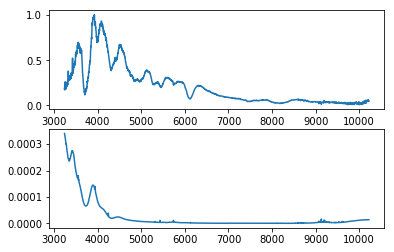

In [10]:
fig, ax = plt.subplots(2,1)
example_spec = spec_array_dered[20]
ax[0].plot(example_spec.wavelength, example_spec.flux)
ax[1].plot(example_spec.wavelength, 1/example_spec.ivar)
plt.show()

In [11]:
spec_attributes = dir(spec_array[0])
print len(spec_array)
for att in spec_attributes:
    print att

170
Bmag_salt
Bmag_salt2
Ebv_host
SNR
__class__
__delattr__
__dict__
__doc__
__format__
__getattribute__
__hash__
__init__
__module__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__slotnames__
__str__
__subclasshook__
__weakref__
av_25
av_mlcs17
av_mlcs31
av_mw
b_minus_v_cfa
b_minus_v_cfa_err
bias_lc
c_lc
c_salt
c_salt2
carbon
cov_mb_c_lc
cov_mb_s_lc
cov_s_c_lc
csp_light_curves
czCMB_host
czLG_host
cz_host
dec
delta_mlcs17
delta_mlcs31
dm15
dm15_array
dm15_from_fits
dm15_source
e_Bmag_salt
e_Bmag_salt2
e_av_mlcs17
e_av_mlcs31
e_c_lc
e_c_salt
e_c_salt2
e_delta_mlcs17
e_delta_mlcs31
e_dm15
e_logMst_lc
e_mb_lc
e_mu_mlcs17
e_mu_mlcs31
e_mu_salt
e_mu_salt2
e_s_salt
e_tmax_lc
e_v
e_x1_lc
e_x1_salt2
e_zCMB_mlcs17
e_zCMB_mlcs31
e_zCMB_salt
e_zCMB_salt2
filename
filt_host
flux
glat_host
glon_host
hubble_res
interp
ivar
light_curves
logMst_lc
low_conf
m_b_cfa
m_b_cfa_err
maxwave
mb_lc
minwave
mjd
mjd_max
morph_array
mtype_host
mu_mlcs17
mu_mlcs31
mu_salt
mu_salt2
na
name
ned_

In [26]:
query_list = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source < 1.8) or (dm15_from_fits < 1.8))"]
composites, sn_arrays, boot_sn_arrays = kpora.make_composite(query_list, boot=True, medmean=1, verbose=False, gini_balance=True, combine=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source < 1.8) or (dm15_from_fits < 1.8))
170 Total Spectra found
5 flagged spectra removed 165 spectra left
3 spectra of peculiar Ias removed 162 spectra left
148 spectra of SNe that have host reddening corrections
Arrays cleaned
148 spectra may have telluric contamination
99 total SNe
removed spectra of SNe with A_V > 2.0
Using 142 spectra of 96 SNe
Gini balancing...
Balanced after 29 iterations
Bootstrapping
scaling boots...
computing confidence intervals...


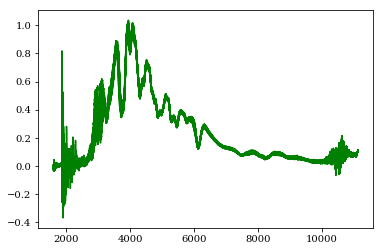

In [22]:
for b in boot_sn_arrays[0]:
    plt.plot(b.wavelength, b.flux, 'g')
plt.show()

Phase:  0.10522052397477366
dm15:  1.1064083944382115
Redshift:  0.0131869184831283
Morphology:  11.74856427660158


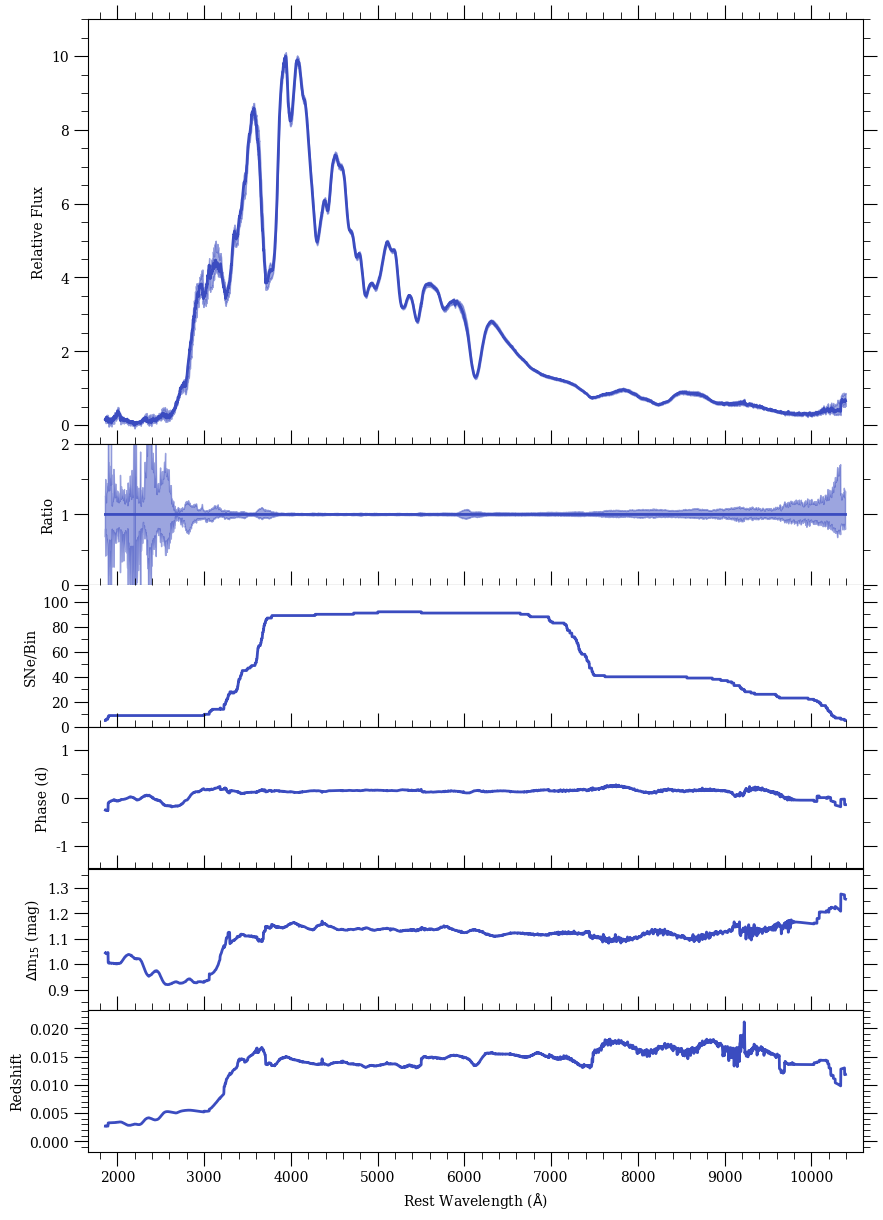

In [23]:
kpora.set_min_num_spec(composites, 5)
kplot.comparison_plot(composites, scale_type=False, min_num_show=5)